# Graphs, Review

## The graph data structure

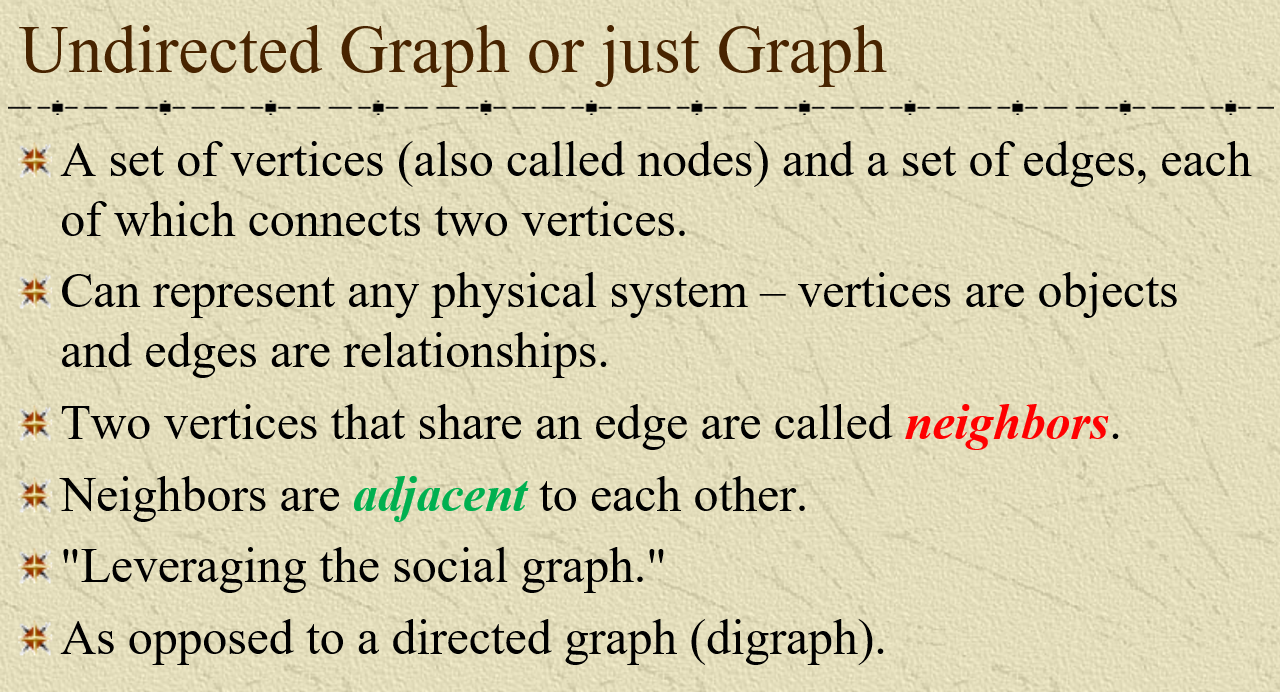

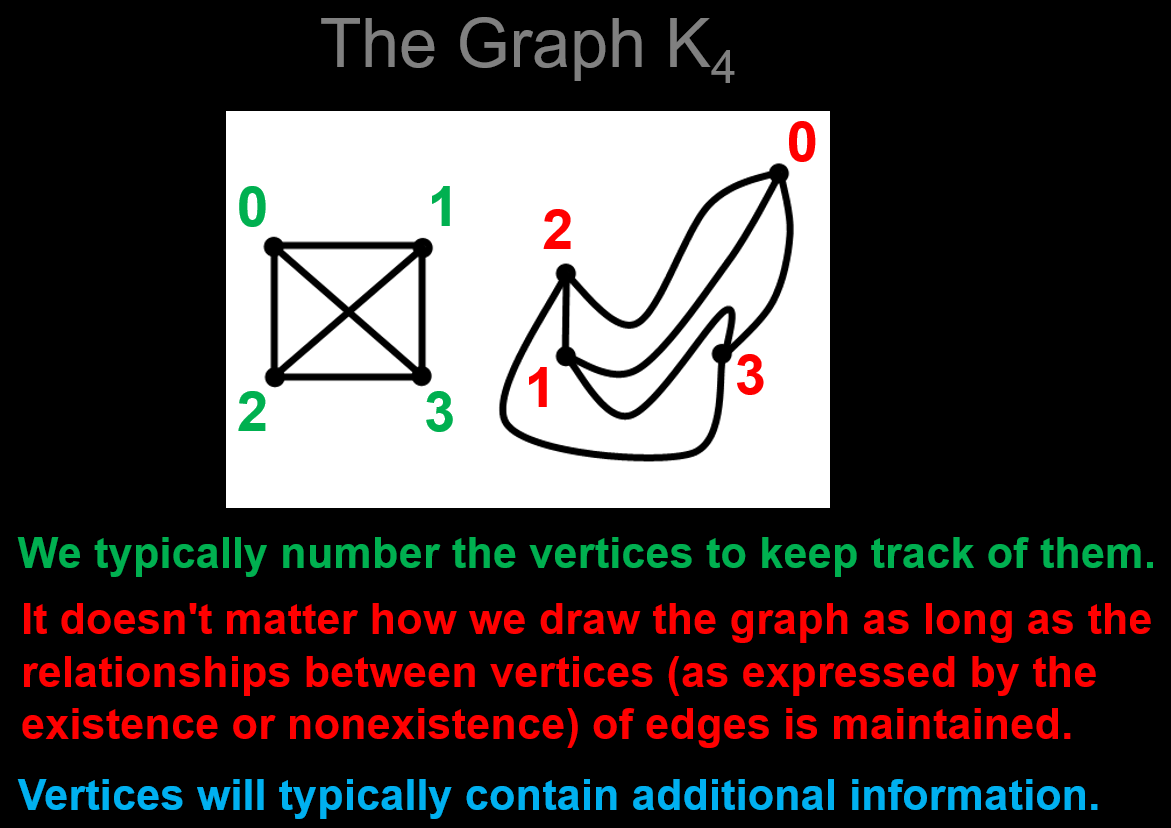

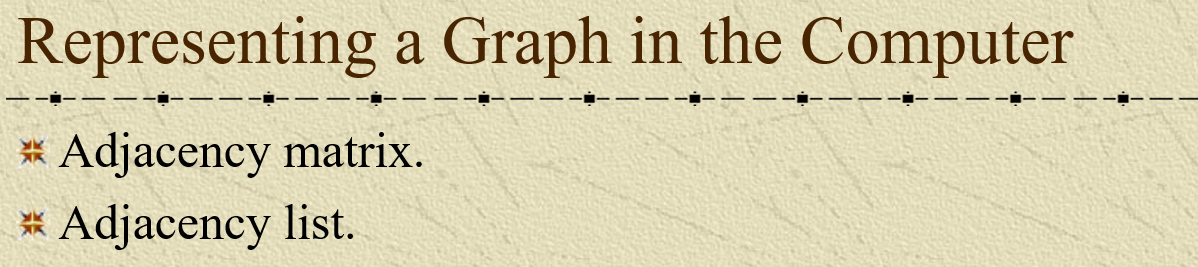

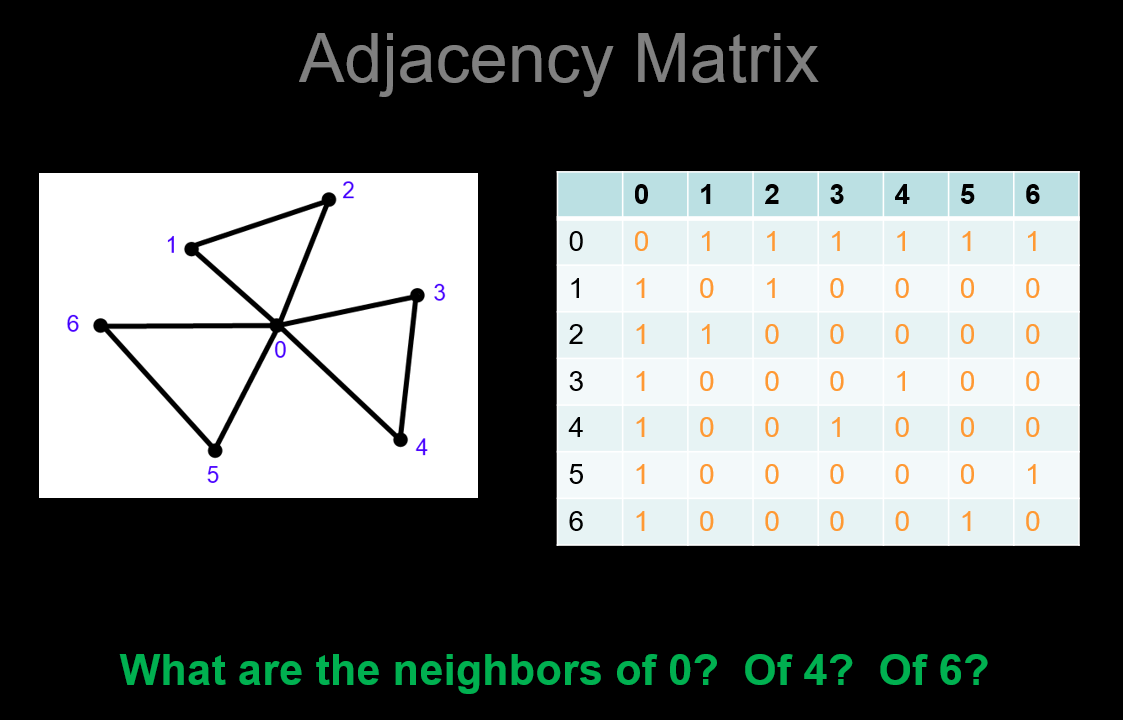

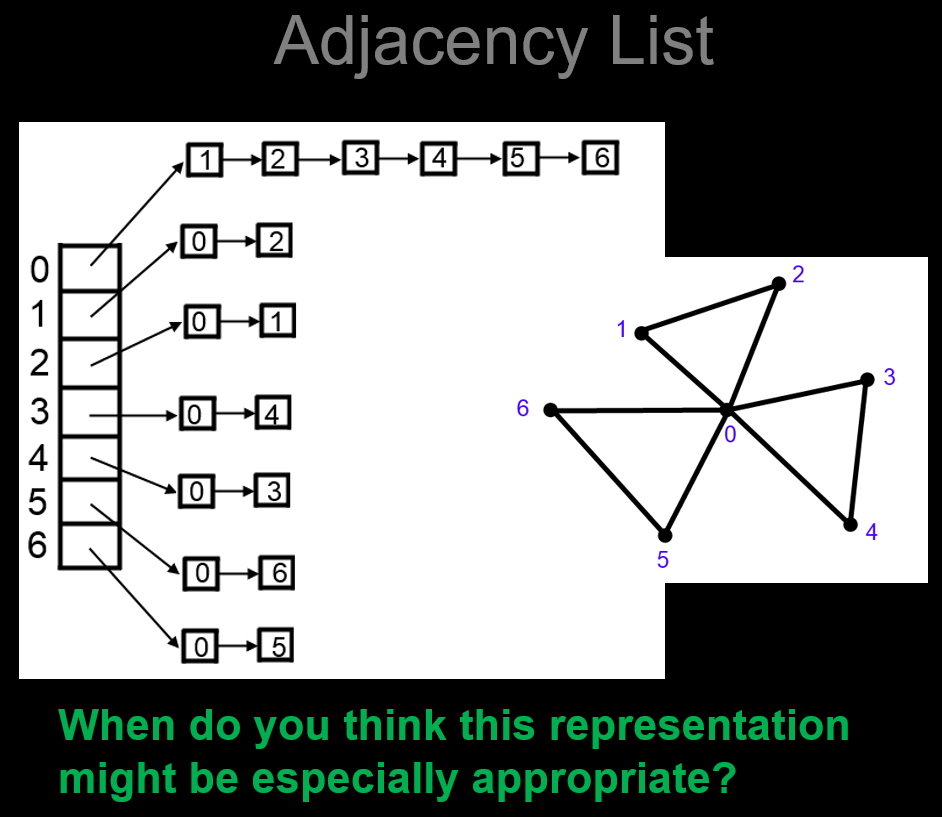

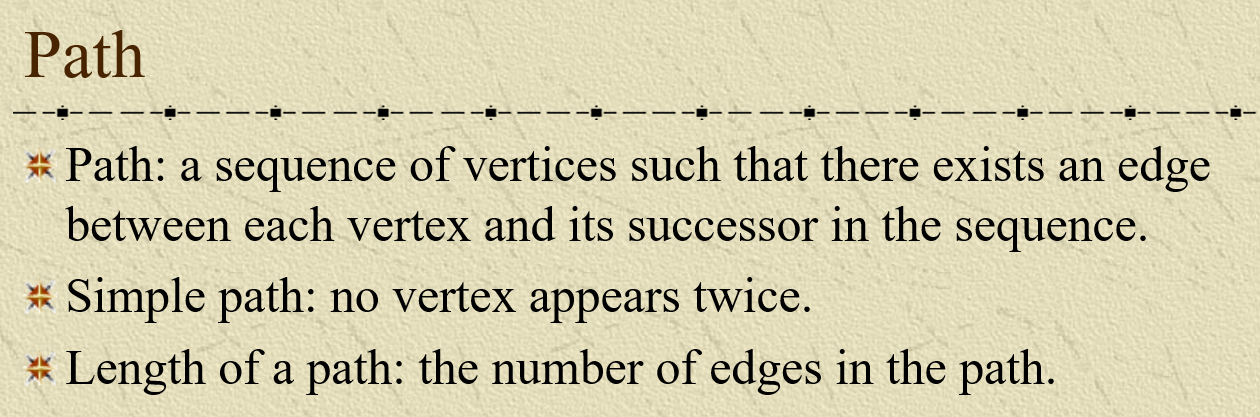

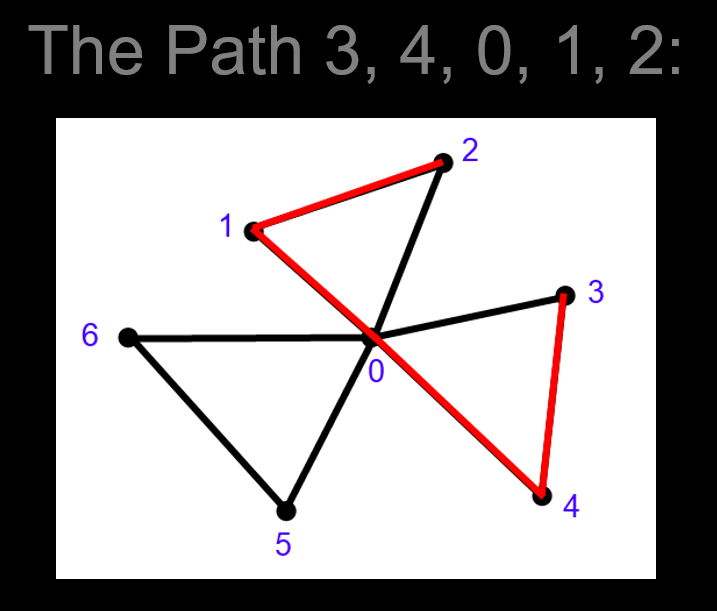

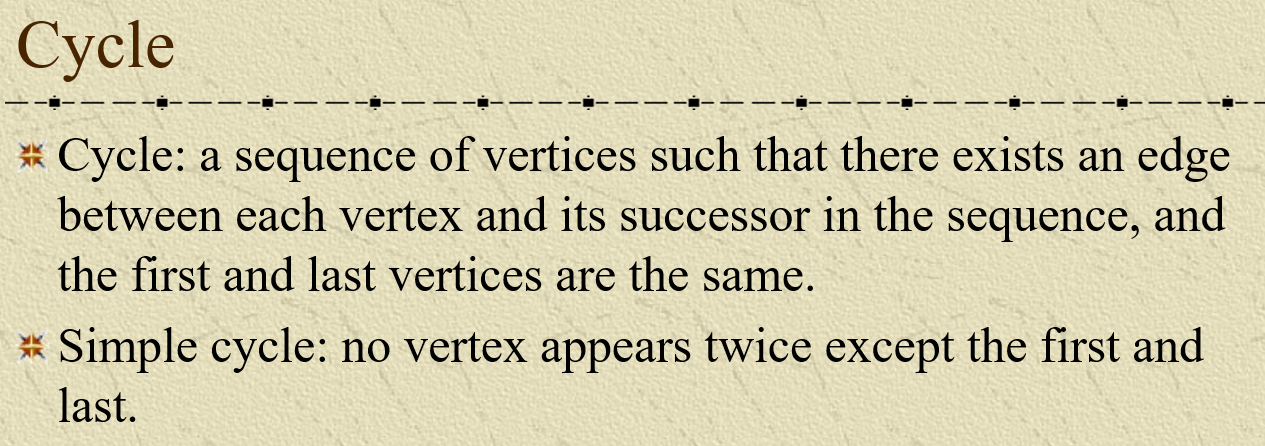

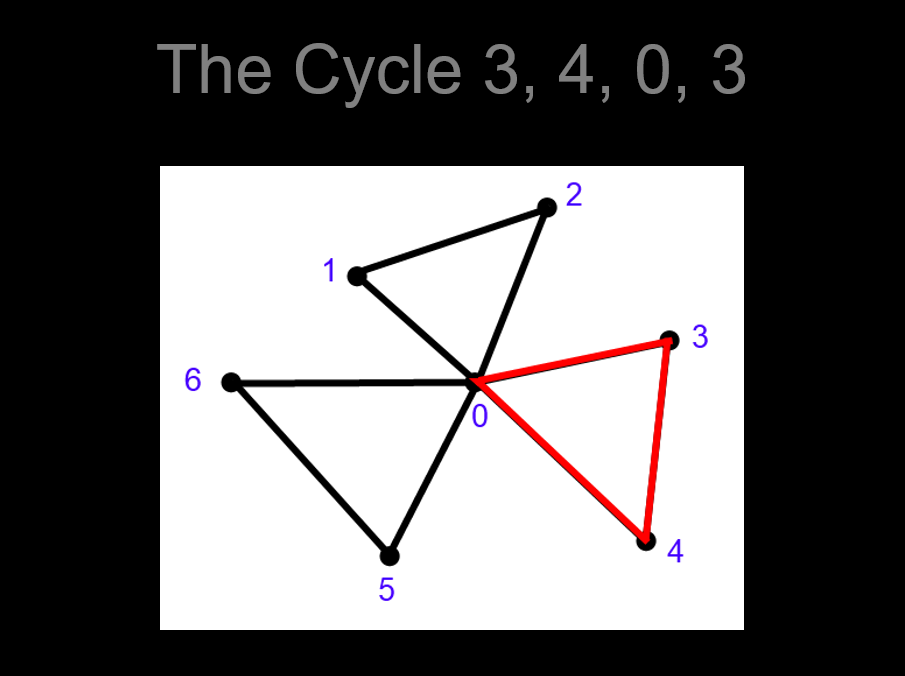

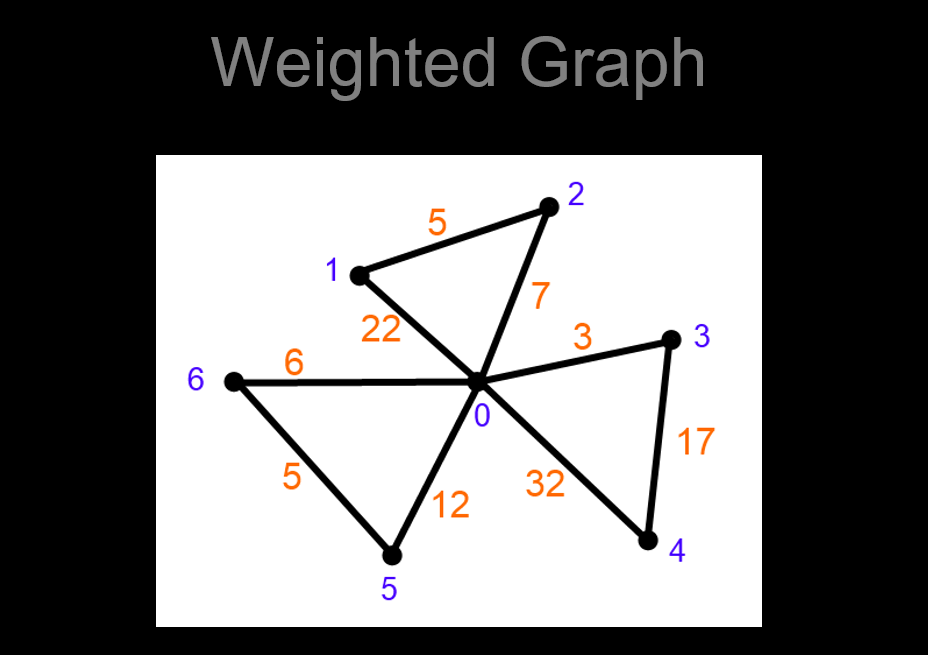

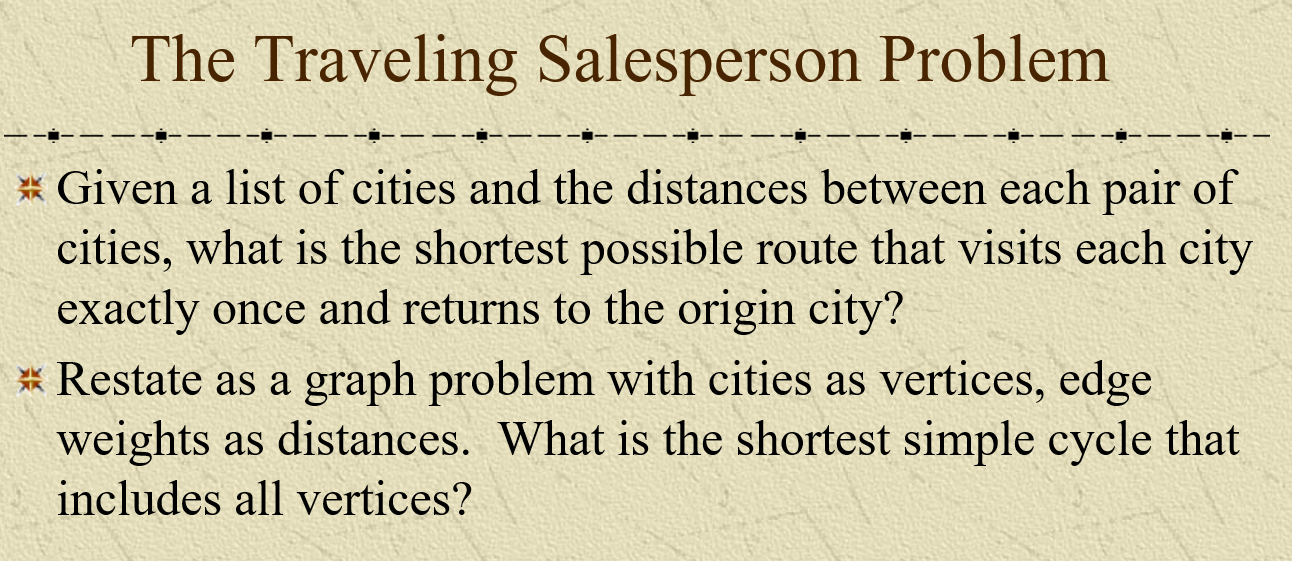

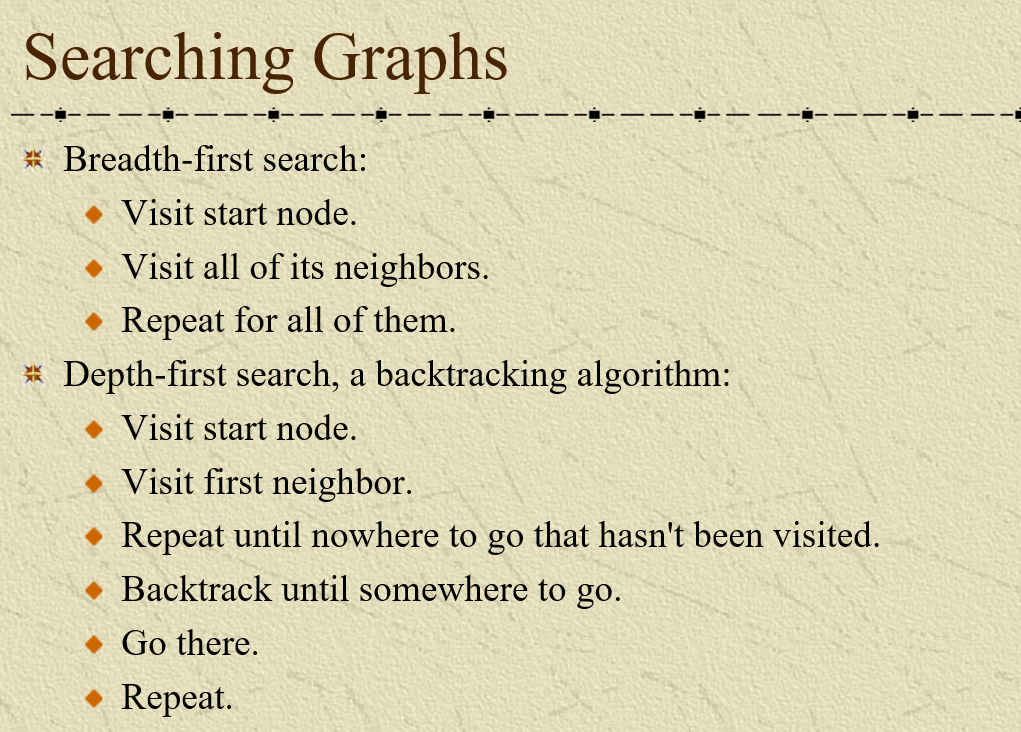

## Graph worksheet

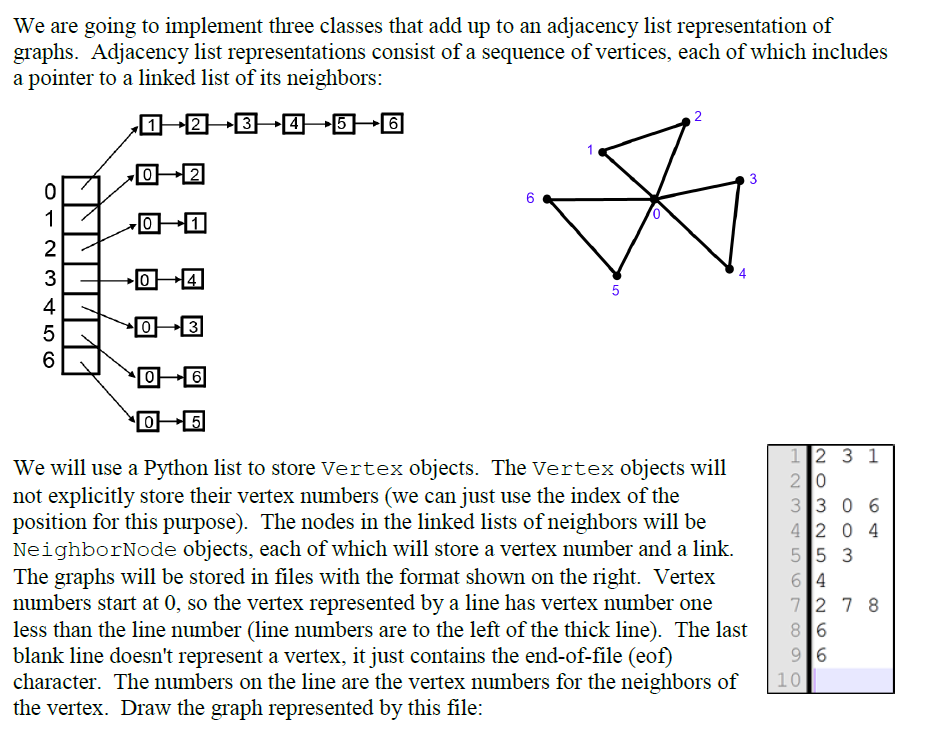

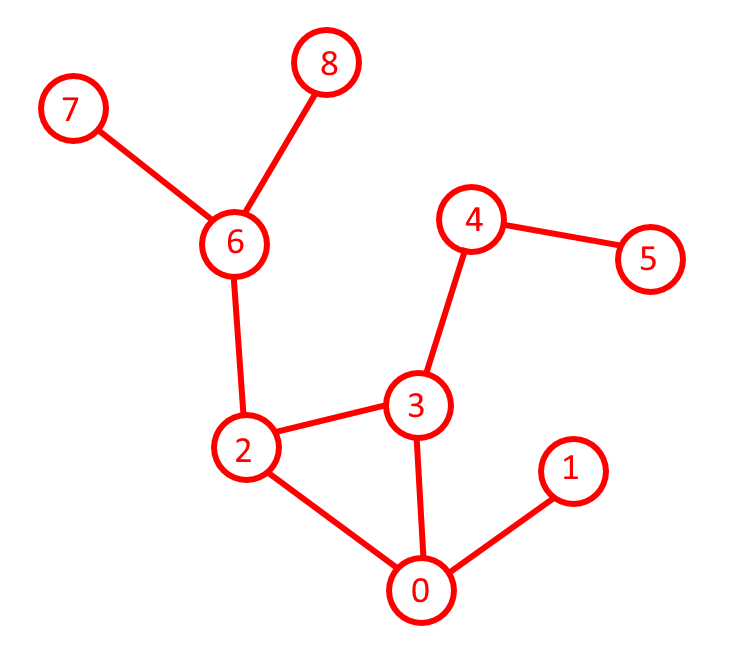

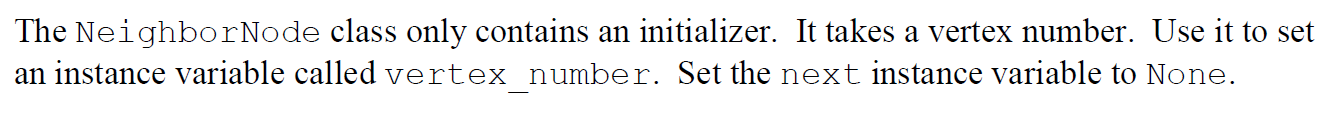

In [1]:
class NeighborNode:
    def __init__(self, neighbor_number):
        self.vertex_number = neighbor_number
        self.next = None        

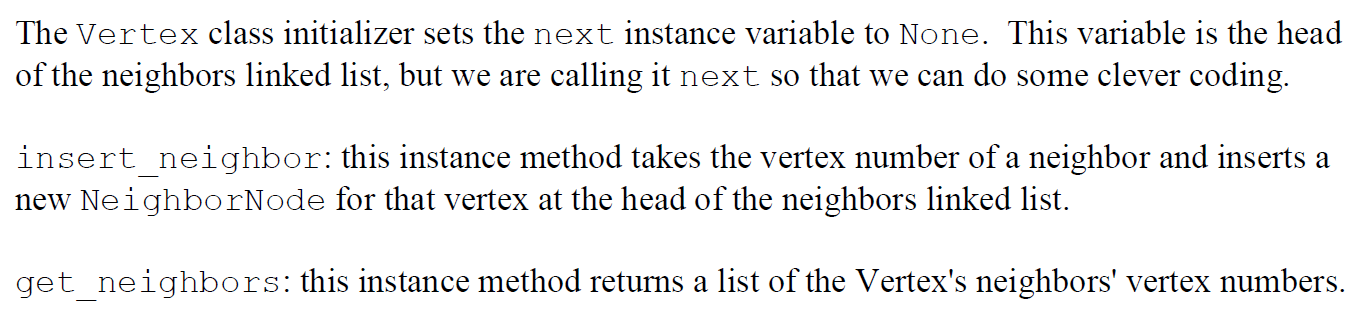

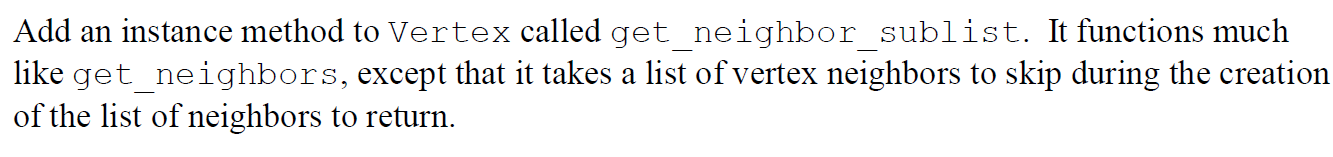

In [3]:
class Vertex:
    def __init__(self):
        self.next = None
        
    def insert_neighbor(self, nvn):
        self.next, self.next.next = NeighborNode(nvn), self.next
        
    def get_neighbors(self):
        neighbors = []
        # gotta luv ducktyping!!!  A Vertex next the first
        # time through, then a NeighborNode next:
        while self.next:
            neighbors.append(self.next.vertex_number)
            self = self.next
        return neighbors
    
    def get_neighbor_sublist(self, skip_list):
        neighbors = []
        while self.next:
            if self.next.vertex_number not in skip_list:
                neighbors.append(self.next.vertex_number)
            self = self.next
        return neighbors

    def get_neighbors2(self):
        neigbors = []
        v = self
        while v.next:
            v = v.next
            neighbors.append(v.vertex_number)
        return neighbors 
    
    def get_neighbor_sublist2(self, skip_list):
        neighbors = []
        v = self
        while v.next: # gotta luv ducktyping!!!  A Vertex next the first
                      # time through, then a NeighborNode next
            v = v.next
            if v not in skip_list:
                neighbors.append(v.vertex_number)
        return neighbors

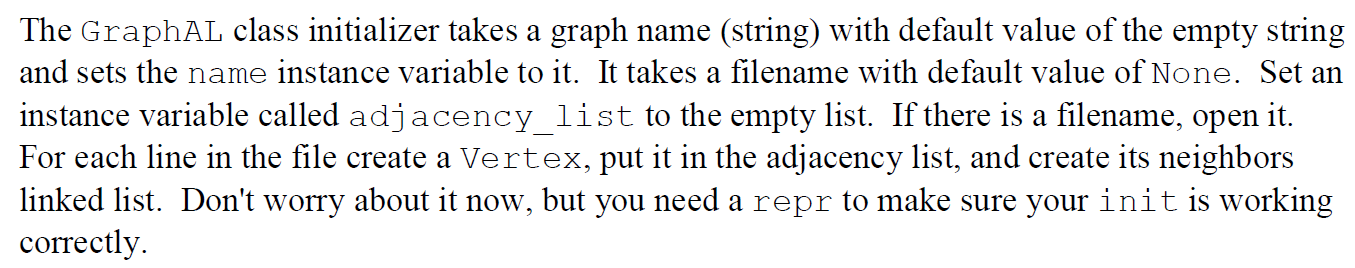

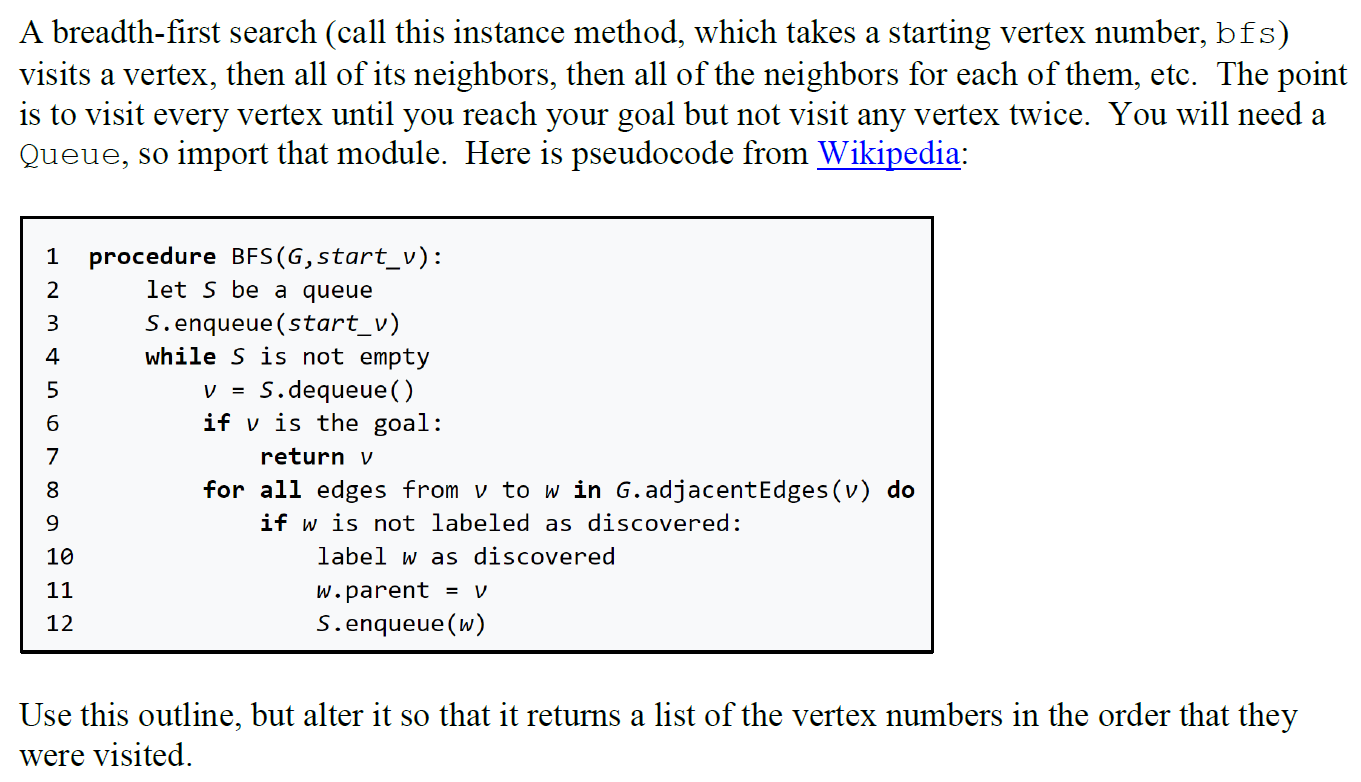

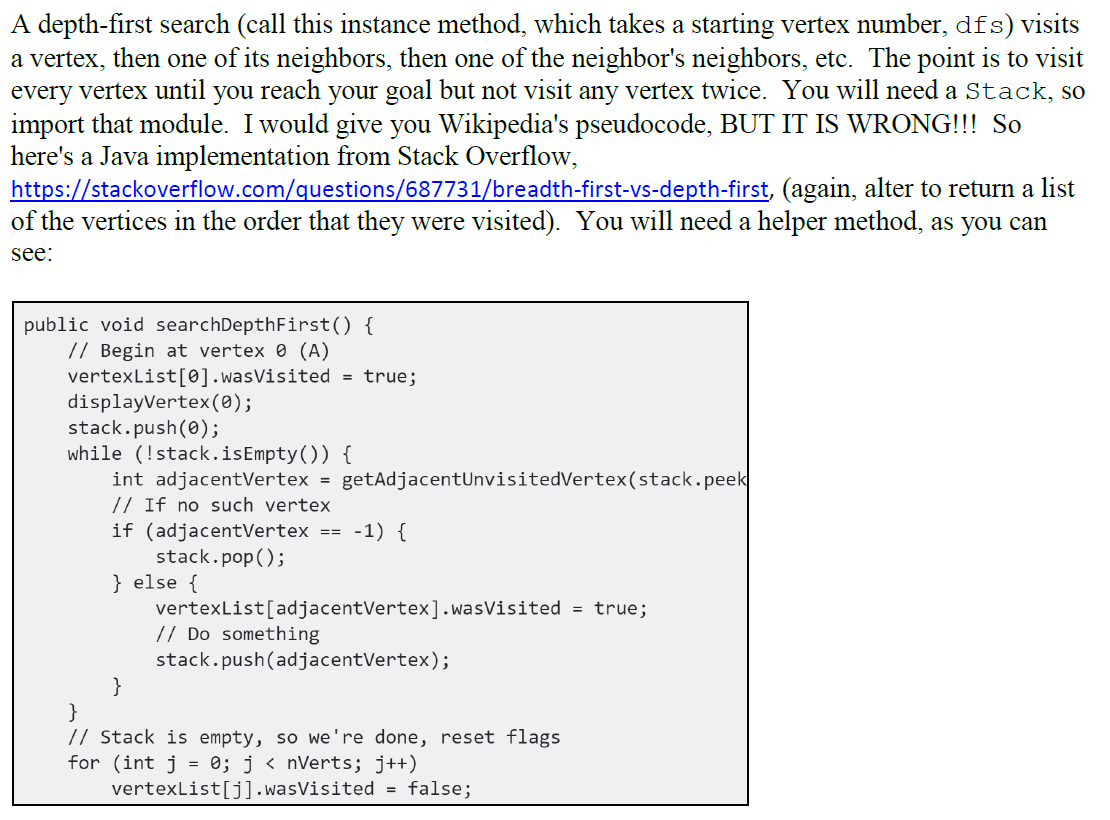

https://stackoverflow.com/questions/687731/breadth-first-vs-depth-first

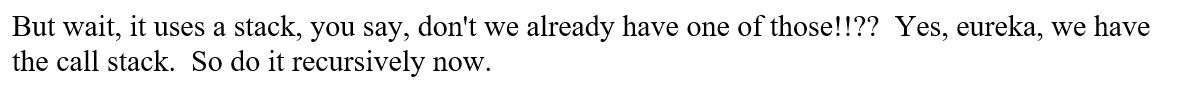

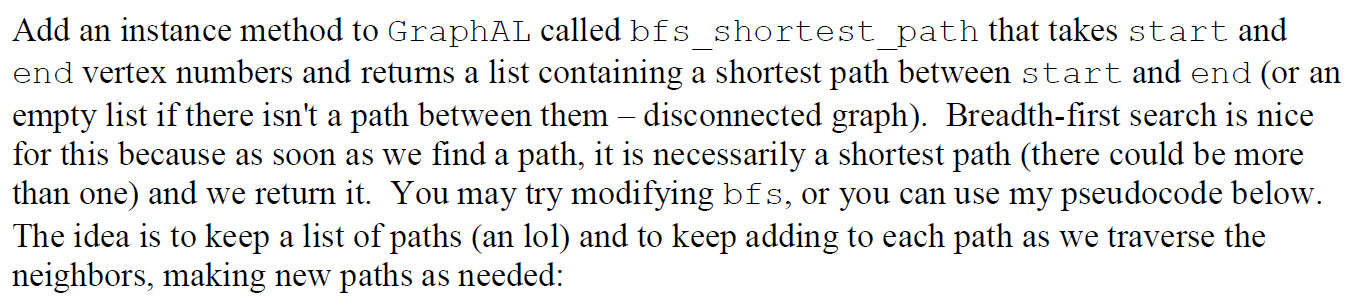

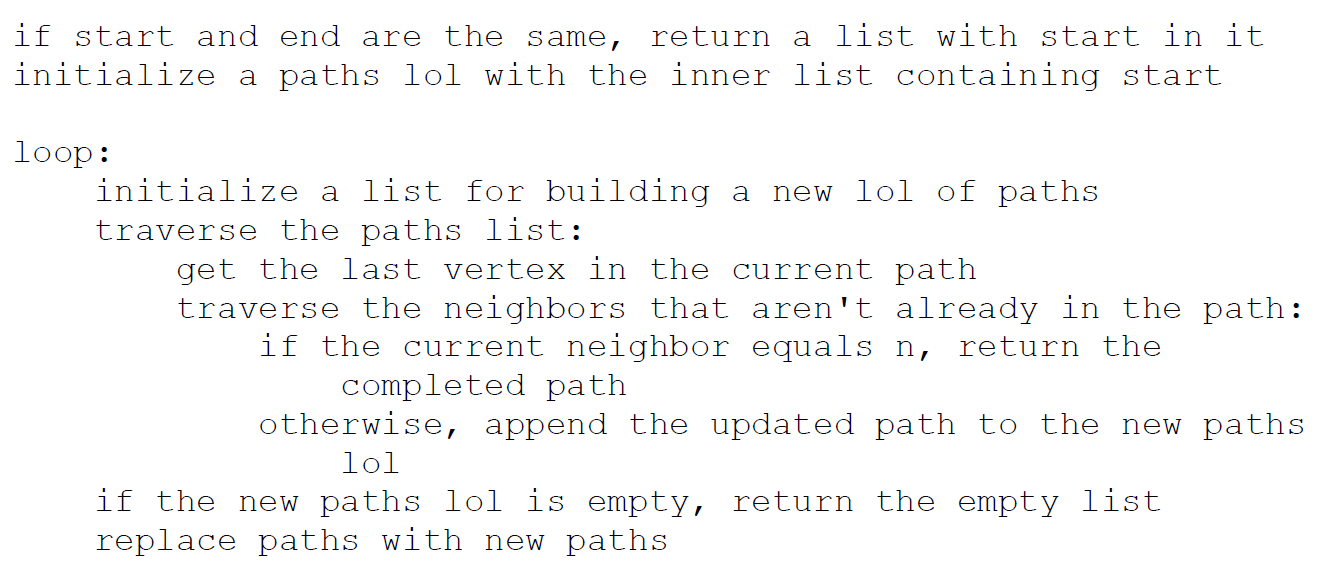

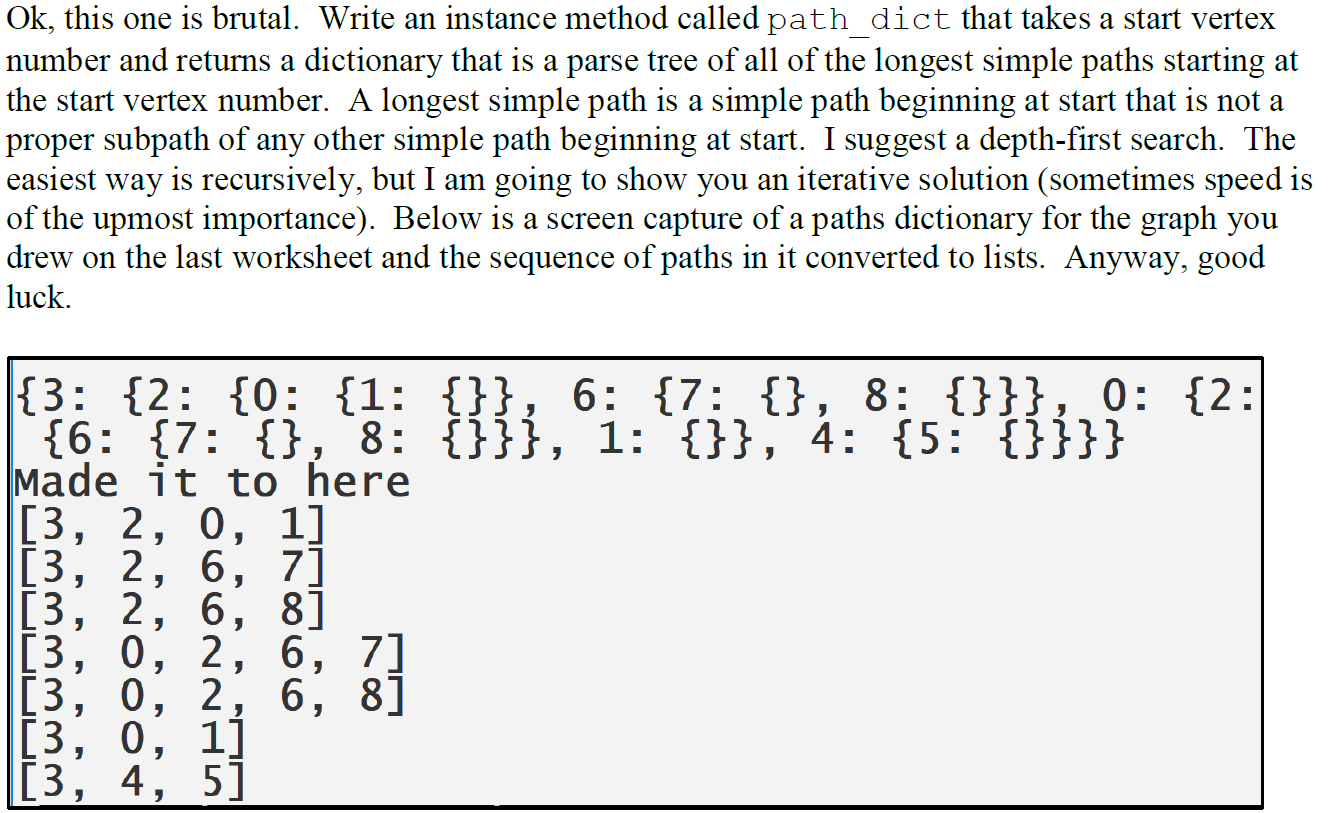

In [5]:
import numpy as np
from my_queue import Queue
from stack import Stack

class GraphAL:
    def __init__(self, name='', fname=None):
        self.name = name
        self.adjacency_list = []
        if fname:
            with open(fname) as fp:
                for i, line in enumerate(fp):
                    self.adjacency_list.append(Vertex())
                    neighbors = line.split()
                    for n in neighbors:
                        self.adjacency_list[i].insert_neighbor(int(n))
                        
    def __repr__(self):
        name = self.name if self.name else "Unnamed"
        header = '-' * 10 + ' ' + name + ' ' + '-' * 10
        text = header + '\n'
        for i, v in enumerate(self.adjacency_list):
            text += ((str(i) + ':').ljust(5) + 
                repr(self.adjacency_list[i].get_neighbors()) + '\n')
        text += '-' * len(header) + '\n'
        return text
    
    def bfs_connected(self, start_vertex_number):
        """
        Instead of returning something that we are searching for,
        we will return a list containing the vertex numbers in the
        order that we visited the vertices.  Only handles connected 
        graphs.  Completely, anyway.
        """
        order = len(self.adjacency_list) # order of graph = #vertices
        visited = np.full(order, False) # maps v number to visited or not
        visited[start_vertex_number] = True
        order_visited = [start_vertex_number] # elements are vn's in order visited
        q = Queue()
        q.enqueue(start_vertex_number)
        
        while not q.is_empty():
            vertex = self.adjacency_list[q.dequeue()] # vertex is a Vertex
            # here's where we would check to see if we found the key
            while vertex.next:
                vertex = vertex.next # vertex now guaranteed to be a NeighborNode
                    # both types have a next, so works - ducktyping!!
                if not visited[vertex.vertex_number]:
                    visited[vertex.vertex_number] = True
                    order_visited.append(vertex.vertex_number)
                    q.enqueue(vertex.vertex_number)
        return order_visited  
    
    def dfs(self, start_vertex_number):
        """
        Just doing a version for connected graphs.  
        """
        order = len(self.adjacency_list) # order of graph = #vertices
        visited = np.full(order, False) # maps v number to visited or not
        visited[start_vertex_number] = True
        order_visited = [start_vertex_number] # elements are vn's in order visited
        s = Stack()
        s.push(start_vertex_number)
        
        while not s.is_empty():
            vertex = self.get_adjacent_unvisited_vertex(s.peek(), 
                                                        visited) 
                # vertex is a vertex number
            if vertex is not None: # if vertex foiled vertex number 0
                # here's where we would check to see if we found the key
                visited[vertex] = True
                order_visited.append(vertex)
                s.push(vertex)
            else:
                s.pop()
        return order_visited
    
    def dfs_recursive(self, start_vertex_number):
        """
        That last one was a little nasty.  Let's break it into two methods.
        """
        order = len(self.adjacency_list) # order of graph = #vertices
        visited = np.full(order, False) # maps v number to visited or not
        order_visited = [] # elements are vn's in order visited
        self.dfs_helper(start_vertex_number, visited, 
                        order_visited)
        return order_visited   
                    
    def dfs_helper(self, vertex_number, visited, order_visited):
        """
        Helper method for dfs.
        """
        order_visited.append(vertex_number)
        visited[vertex_number] = True
        vertex = self.adjacency_list[vertex_number]
        while vertex.next:
            vertex = vertex.next 
            if not visited[vertex.vertex_number]:
                self.dfs_helper(vertex.vertex_number, 
                                visited, order_visited)

    def bfs_shortest_path(self, start, end):
        """
        We will be making a bunch of lists to keep track of our paths.
        As soon as we find a path to end, it must be a shortest path
        because we are going bfs.
        """
        if start == end:
            return [start]
        paths = [[start]] # elements are vn's in order visited
        
        while True:
            new_paths = []
            for path in paths:
                last_vertex = path[-1]
                for n in self.adjacency_list[last_vertex].get_neighbor_sublist(path):
                    if n == end:
                        return path + [n]
                    new_paths.append(path + [n])
            if not len(new_paths):
                return []
            paths = new_paths
            
    def path_dict(self, start_vertex_number):
        """ 
        Backtracking dfs algorithm.  One stack.  Better.  Do this one.
        """
        path_dict = {start_vertex_number:{}} # elements are vn's in order visited
        neighbors = self.adjacency_list[start_vertex_number].get_neighbors()
        
        if not neighbors:
            return path_dict
            
        order = len(self.adjacency_list) # order of graph = #vertices
        visited = np.full(order, False) # maps v number to visited or not
        visited[start_vertex_number] = True
        
        s = Stack()
        s.push((neighbors, path_dict[start_vertex_number]))
        
        while True:
            vertex_list, current_dict = s.peek()
            vertex = vertex_list[-1]
            visited[vertex] = True
            current_dict[vertex] = {}
            neighbors_orig = self.adjacency_list[vertex].get_neighbors()
            neighbors = []
            for vn in neighbors_orig:
                if not visited[vn]:
                    neighbors.append(vn)
            if neighbors:
                s.push((neighbors, current_dict[vertex]))
            elif len(vertex_list) > 1:  # end of longest path, 
                                        # time to backtrack to next neighbor
                visited[vertex] = False
                vertex_list.pop()
            else: # time to backtrack down level(s).  have to eliminate all levels with 
                  # only one vertex left until found one with more than that
                while True:
                    visited[vertex] = False
                    s.pop()
                    if s.is_empty():
                        return path_dict
                    vertex_list = s.peek()[0]
                    vertex = vertex_list.pop()
                    
                    if vertex_list:
                        visited[vertex] = False
                        break